# Project 2: Transistors and Amplifiers

This project will introduce two basic techniques for using currents and voltages to control currents and voltages. Why would you want to do that? It turns out that many times the physical system we're working with is not *directly* compatable with the tools we have to control or measure that system. For example, suppose we want to control the temperature of an experiment. It turns out there are materials with properties that depend on temperature (e.g., resistance, band gap voltage, and so on). If we can somehow turn those properties into electrical signals, we can use those signals to infer the temperature of the system. The bad news is that those signals are usually *not* a voltage from 0-5V that can simply be connected to the Arduino for measurement. We often (most of the time!) need to process those electrical signals in order to get something that an Arduino can measure. That's where amplifiers can be extremely handy. A transistor is, sort of, the worlds simplest example of a crude, but effective, amplifier. *So* first we'll learn how a transistor works, and then we'll jump straight to an operational amplifier (which is really just a complex circuit, containing many transistors, so that it does the job much more effectively).

## The NPN Biploar Junction Transistor (BJT)

The schematic symbol for an NPN [Bipolar Junction Transistor (BJT)](https://en.wikipedia.org/wiki/Bipolar_junction_transistor) looks like this:

![BJT](proj2-npn-trans-only.png)

The pins are called 1) Emitter, 2) Base, 3) Collector. You can generally think of the Base-Emitter (BE) as a diode (hence the little diode symbol embedded in the picture). The BE diode obeys the Shockley equation over the range of currents and voltages we're goign to be using. The magic comes when we look at the behavior of the CE connection. It turns out the current through the CE junction is *proportional* to the current through the BE junction. The proportionality constant is called the *current* *gain* $\beta$.

$$ I_{ce} = \beta I_{be} $$

What's the use? Because $\beta$ can be a large number (think 20 or 50) a small change in $I_{be}$ can produce a large change in $I_{ce}$ which means signals can be *amplified*.

The first thing we need to do is to set up a transistor to mesure $\beta$ and see how that works. Set up the following circuit. For this one, you can re-use the same RC circuit on the PWM output of the Arduino that you used last time. Suppose the max current through the BE junction should be $0.1\ {\rm mA}$ and the max current through the CE junction should be $\approx 3 {\rm mA}$. Roughly, how big should R2 and R3 be in this case?

![NPN + Arduino](proj2-npn-trans-arduino.png)



In [2]:
#
# Load up some packages
#

import numpy as np
import matplotlib.pyplot as pl
import pandas as pd

# Estimate $\beta$

Now run an experiment similar to last week's project but this time collect data to estiamate $\beta$. There should be a range of $I_{be}$ values in which $I_{ce}$ is increasing proportionally. Identify this region, and use the data you collect to estimate $\beta$. You'll be given a [2N3904](https://ace.uindy.edu/access/content/group/202020-PHYS-230-02/Data%20Sheets/2N3904.pdf) transistor. Look up the *pinout* of the transistor you're given and make sure you connect it as shown in the schematic diagram. If you have questions, please *ask*!

# Operational Amplifiers

Next we're going to learn about the behavior of *operational* *amplifiers* (or "opamp"). An operational amplifier is simply a collection of transistors designed to multiply the difference between two input voltages by a large constant factor (called the "open loop gain") and set the output voltage to the result of this "operation":

$$V_{\rm out} = G(V_+ - V_-)$$

The schematic diagram below shows the internal plumbing of the TI version of one unit of the [LM358N](https://ace.uindy.edu/access/content/group/202020-PHYS-230-02/Data%20Sheets/lm358-n.pdf) opamp:

![TI Internals](929902.png)

$$\text{One unit of the popular TI LM538N}$$

You can see that there are *lots* of transistors involved. We're going to construct a simple "2x" multiplier using the opamp as a tool in our toolkit to make it work. To begin, use the bench function generator to get an input signal that looks something like this:

Text(0.5, 1.0, 'Input Voltage from Function Generator')

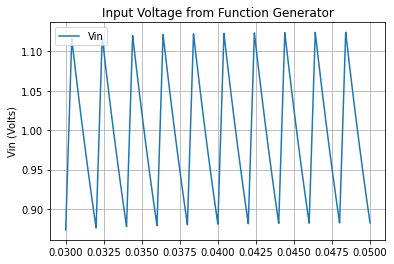

In [5]:
df=pd.read_csv('triangle.csv', sep='\t')
t = df[df['time']>0.03]['time'].values
V = df[df['time']>0.03]['V(C)'].values
pl.plot(t,V,label="Vin")
pl.grid()
pl.legend(loc=2)
pl.ylabel("Vin (Volts)")
pl.title("Input Voltage from Function Generator")

# Amplify this signal

Now, we'll use this signal as an input to an amplifier with the idea of multiplying the voltage by a factor of 2. How? We'll use the LM358N as an *amplifier*. The schematic symbol for an amplifier is a sideways isosceles triangle like so (This example is an [LM358N](https://ace.uindy.edu/access/content/group/202020-PHYS-230-02/Data%20Sheets/lm358-n.pdf), but there are many brands and types of amplifiers):

![Amplifier](./amp-only.png)

The amplifier is designed to do whatever it can to make it's "+" and "-" inputs equal to one another. If the "+" is greater than the "-" the amplifier *increases* its output. It's up the to designer to set up the circuit so that this has the effect of lowering the difference of the "+" and "-" input. Similarly, if the "+" input is less than the "-" input the output of the amplifier *decreases* its output. The output keeps increasing or decreasing until either the output reaches a limit (positive or negative supply limits usually) or it is successful in making the two inputs nearly equal (within fractions of a millivolt). Consider the following circuit:

![Amplifier Circuit](./proj2-npn-arduino-amp.png)

As an example, suppose R3 is 10k and R2 is 1k. Suppose further than the voltage on the "+" input is 0.3V. What will the output of the amplifier have to be to make the two inputs equal. Will the recipe described in the preceding paragraph accomplish this? If you have trouble with this question, please ask! It's not hard, but it may take some practice to remember enough about your basic circuit physics to figure it out. Be patient, but don't give up! Ask if you have questions.

## Experiment

Now, design an amplifier circuit that will produce a gain of 2 using the circuit given above. Use the sawtooth waveform as an input, and use an oscilloscope to monitor the input and output voltages to measure the effect. We could, of course, write an program and use the Artemis Nano to measure these results, but we'll keep it simple and give you some experience with the bench tools.